# Problem Statement for Constems-AI Systems Private Limited
# Software Development (AI/ML Product Group) internship



##  Assignment: Create a deep neural network (CNN) classifier in Python using any framework 
### 1). to distinguish "rectangles" from "circles" (the dataset is attached). 
###  2). Also, create a class method that takes a cv2 image as an input and returns a prediction string as an output.


# Solution and Results:
### A1). using tensorflow library and keras api for building cnn classifier which predicts and distinguish images.
### A2). created method called predict that takes cv2 image and returns predictions.

In [44]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [45]:
IMGSIZE = 64
BATCHSIZE = 32
CHANNELS = 3
EPOCHS=30

In [65]:
ds = tf.keras.preprocessing.image_dataset_from_directory(
    "toy_train",
    shuffle=True,
    image_size=(IMGSIZE,IMGSIZE),
    batch_size=BATCHSIZE
)
ds

Found 1000 files belonging to 2 classes.


<BatchDataset shapes: ((None, 64, 64, 3), (None,)), types: (tf.float32, tf.int32)>

In [66]:
len(ds)

32

In [67]:
class_names = ds.class_names
class_names

['circle', 'rectangle']

In [68]:
for image_batch, labels_batch in ds.take(1):
    print("1 batch:" ,image_batch.shape)
    print("labels in 1 batch:",labels_batch.numpy())
    print("1st batch 1st image:", image_batch[0])

1 batch: (32, 64, 64, 3)
labels in 1 batch: [0 1 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 0 1 0 0 1 0]
1st batch 1st image: tf.Tensor(
[[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 253.]
  [254. 255. 251.]
  [254. 255. 251.]]

 ...

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]], shape=(64, 64, 3), dtype=float32)


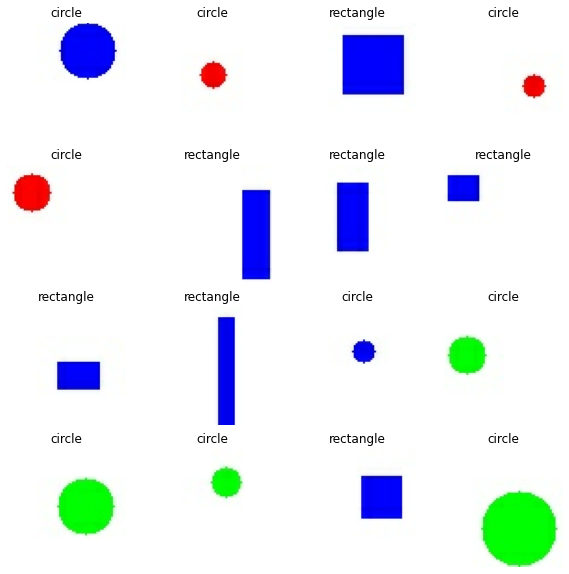

In [69]:
#Visualization of images
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in ds.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [70]:
len(ds)


32

In [87]:
def get_dataset_partitions_tf(dataset, train_split=0.8, val_split=0.2, shuffle=True, shuffle_size=100):
    assert (train_split + val_split) == 1
    
    ds_size = len(dataset)
    
    if shuffle:
        dataset = dataset.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    
    val_size = int(val_split * ds_size)
    
    train_ds = dataset.take(train_size)    
    val_ds = dataset.skip(train_size)
    
    return train_ds, val_ds

In [88]:
train_ds, val_ds = get_dataset_partitions_tf(ds)

In [89]:
len(train_ds)
len(val_ds)


7

In [90]:
train_ds = train_ds.cache().shuffle(200).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(200).prefetch(buffer_size=tf.data.AUTOTUNE)


In [91]:
#preprocessing on data
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMGSIZE, IMGSIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [92]:
#rotating,flipping and contrasting images
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [93]:
#applying augmentation to train_ds
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

# Model Building

In [94]:
input_shape = (BATCHSIZE, IMGSIZE, IMGSIZE, CHANNELS)
n_classes = 2

model = models.Sequential([
    resize_and_rescale,
   
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [95]:
model.summary()


Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_14 (Sequential)  (32, 64, 64, 3)           0         
                                                                 
 conv2d_36 (Conv2D)          (32, 62, 62, 32)          896       
                                                                 
 max_pooling2d_36 (MaxPoolin  (32, 31, 31, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (32, 29, 29, 64)          18496     
                                                                 
 max_pooling2d_37 (MaxPoolin  (32, 14, 14, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (32, 12, 12, 64)        

# Compile Model

In [96]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [97]:
history = model.fit(
    train_ds,
    batch_size=BATCHSIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=30,
)

Epoch 1/30
25/25 [==============================] - 5s 174ms/step - loss: 0.6027 - accuracy: 0.6637 - val_loss: 0.4371 - val_accuracy: 0.8304
Epoch 2/30
25/25 [==============================] - 4s 159ms/step - loss: 0.3808 - accuracy: 0.8388 - val_loss: 0.3618 - val_accuracy: 0.8348
Epoch 3/30
25/25 [==============================] - 4s 145ms/step - loss: 0.3660 - accuracy: 0.8363 - val_loss: 0.3664 - val_accuracy: 0.8348
Epoch 4/30
25/25 [==============================] - 4s 144ms/step - loss: 0.3616 - accuracy: 0.8400 - val_loss: 0.3631 - val_accuracy: 0.8348
Epoch 5/30
25/25 [==============================] - 4s 154ms/step - loss: 0.3585 - accuracy: 0.8375 - val_loss: 0.3894 - val_accuracy: 0.8438
Epoch 6/30
25/25 [==============================] - 4s 145ms/step - loss: 0.3638 - accuracy: 0.8400 - val_loss: 0.3648 - val_accuracy: 0.8571
Epoch 7/30
25/25 [==============================] - 5s 197ms/step - loss: 0.3566 - accuracy: 0.8388 - val_loss: 0.3591 - val_accuracy: 0.8348
Epoch 

In [98]:
scores = model.evaluate(val_ds)

7/7 [==============================] - 0s 41ms/step - loss: 0.0195 - accuracy: 0.9911


In [99]:
#evaluating on test data
test_ds = ds = tf.keras.preprocessing.image_dataset_from_directory(
    "toy_test",
    shuffle=True,
    image_size=(IMGSIZE,IMGSIZE),
    batch_size=BATCHSIZE
)
test_ds

Found 200 files belonging to 2 classes.


<BatchDataset shapes: ((None, 64, 64, 3), (None,)), types: (tf.float32, tf.int32)>

In [100]:
#evaluating our model score
scores_test = model.evaluate(test_ds)

7/7 [==============================] - 1s 44ms/step - loss: 0.0086 - accuracy: 1.0000


In [101]:
scores_test

[0.008642126806080341, 1.0]

# plotting accuracy curve

In [102]:
history

In [103]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 25}

In [104]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [105]:
type(history.history['loss'])


list

In [106]:
len(history.history['loss'])

30

In [107]:
acc = history.history['accuracy']
acc
len(acc)

30

In [108]:
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


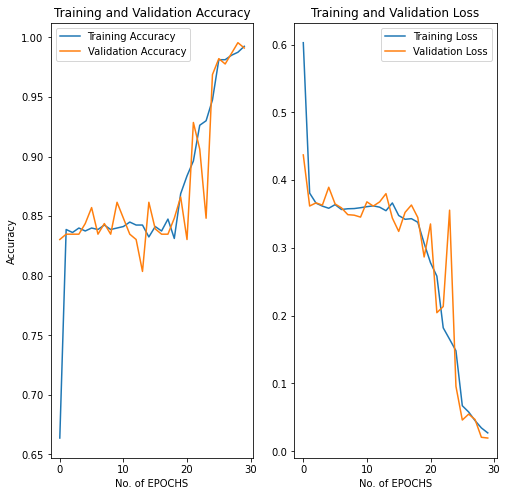

In [109]:
#accuracy and loss chart compasrion between train and val ds
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.xlabel("No. of EPOCHS")
plt.ylabel("Accuracy")
plt.legend(loc='upper left')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.xlabel("No. of EPOCHS")
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Prediction on a image from test ds

test image to predict
ACTUAL label: circle
PREDICTED label: circle


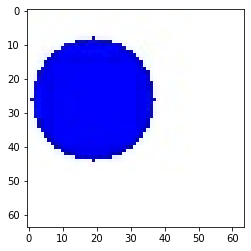

In [112]:

for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("test image to predict")
    plt.imshow(first_image)
    print("ACTUAL label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("PREDICTED label:",class_names[np.argmax(batch_prediction[0])])

# function for direct prediction and inference 

In [137]:
#creating predcit method for image prediction
def predict(model, img):
    #some processing on image file
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0) #create a batch

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]  #np.argmax returns index of maximum value and
    confidence = round(100 * (np.max(predictions[0])), 2)            #class names are ['circle', 'rectangle']
    return predicted_class, confidence

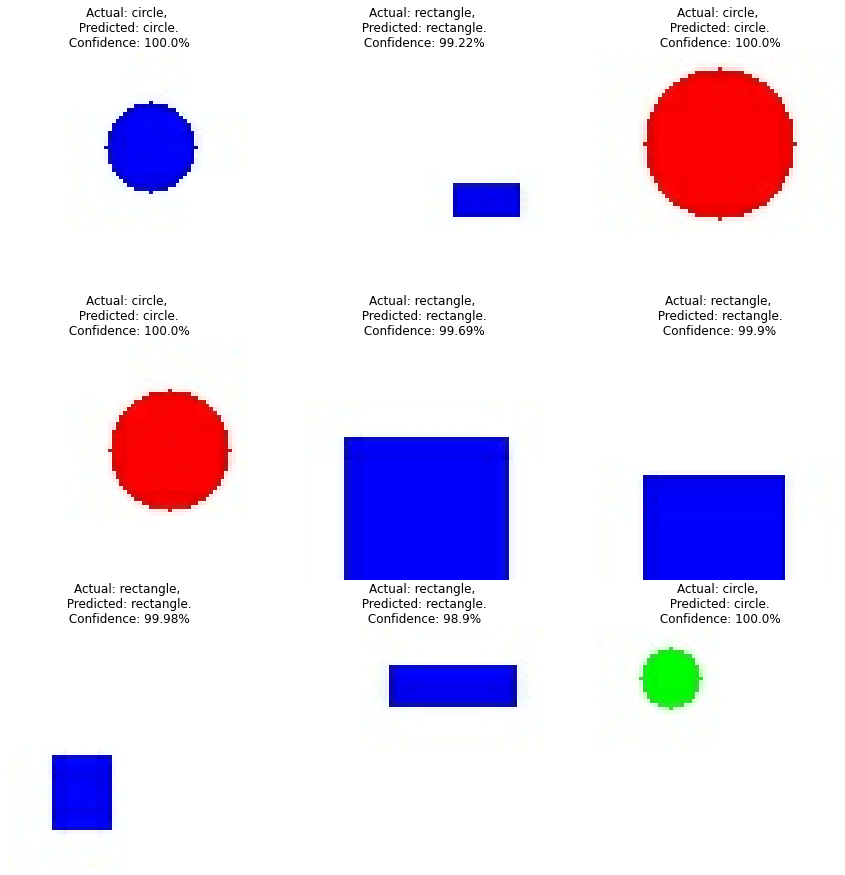

In [138]:
#optional
#running our prediction fucntion on some images
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

# example of loading an image manually in our predictor using KERAS API


In [132]:
from keras.preprocessing.image import load_img
# load the image
img = load_img(r"C:\Users\risha\toy_test\circle\57.jpg")
predict(model,img)

('circle', 100.0)

# example of loading an image manually in our predictor using OPENCV-py


In [140]:
import cv2
path = r"C:\Users\risha\toy_test\circle\57.jpg"
  
# Using cv2.imread() method
img = cv2.imread(path)
predict(model,img)

('circle', 100.0)